In [16]:
from flu_matrix_completion import *

In [17]:
import os
import pandas as pd
import numpy as np

In [18]:
os.listdir()

['.DS_Store',
 'figs',
 'Untitled.ipynb',
 'process_Ertesvag_data.ipynb',
 'prediction_analyses.ipynb',
 'models',
 '__pycache__',
 'README.md',
 'example.ipynb',
 '.ipynb_checkpoints',
 'starting_code',
 'example_all.ipynb',
 'data',
 'flu_matrix_completion.py',
 'Ertesvag 2022 Fig S3A.csv',
 'Ertesvag 2022 Fig S3B.csv']

In [20]:
'''
Convert Ertesvag datasets into HI_data_tables format. 
'''

E3A = pd.read_csv('Ertesvag 2022 Fig S3A.csv')
E3B = pd.read_csv('Ertesvag 2022 Fig S3B.csv')



In [21]:
def convert_Ertesvag_df(ertesvag_df, B=False):
    ertesvag_df = ertesvag_df.set_index("Virus")
    if B:
        suff = "_B"
    else:
        suff = "_A"
    ertesvag_df['Sera Name'] = ertesvag_df['Serum'] + "_" + ertesvag_df['Time'] + suff
    # Define row and column names
    rows = len(ertesvag_df['Sera Name'].unique())
    columns = list(ertesvag_df.index.unique())
    # Create a DataFrame with NaN values, using row and column names
    data = np.nan * np.empty((rows, len(columns)))
    df = pd.DataFrame(data, index=ertesvag_df['Sera Name'].unique(), columns=columns)
    for i in df.index: # Iterate over virus
        entry = ertesvag_df[ertesvag_df['Sera Name']==i]['HAI']
        values = entry.to_numpy()
        viruses = entry.index
        df.loc[i, viruses] = values
    return df

In [30]:
E3A_df = convert_Ertesvag_df(E3A, B=False)
E3B_df = convert_Ertesvag_df(E3B, B=True)

In [31]:
antisera_labels = {'sampleID': E3A_df.index,
                   'groupID': len(E3A_df.index)*['Ertesvag2022_S3A']}
pd.DataFrame(antisera_labels).set_index("sampleID").to_csv('data/Ertesvag_2022_Fig_S3A_antisera_table')

antisera_labels = {'sampleID': E3B_df.index,
                   'groupID': len(E3B_df.index)*['Ertesvag2022_S3B']}
pd.DataFrame(antisera_labels).set_index("sampleID").to_csv('data/Ertesvag_2022_Fig_S3B_antisera_table')

In [32]:
E3A_df.to_csv("data/Ertesvag_2022_Fig_S3A.csv")
E3B_df.to_csv("data/Ertesvag_2022_Fig_S3B.csv")

<Axes: >

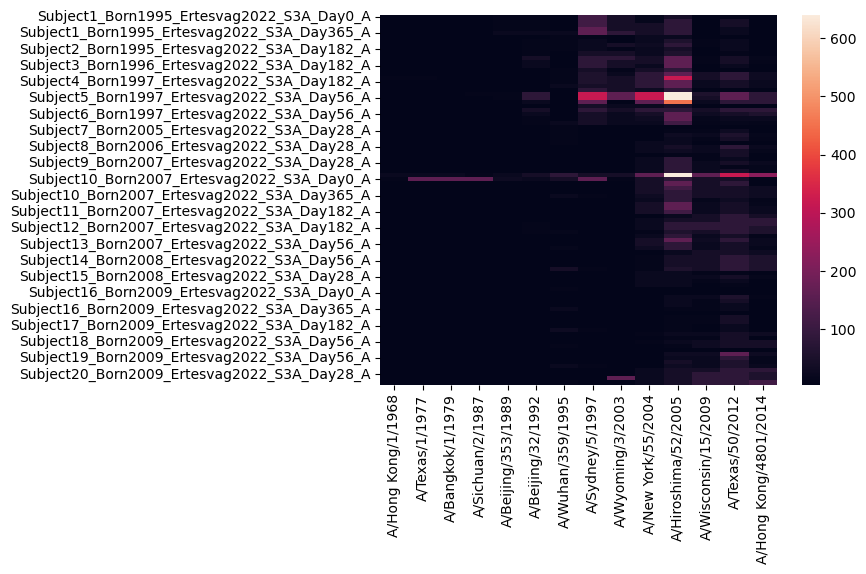

In [26]:
sns.heatmap(E3A_df)

<Axes: >

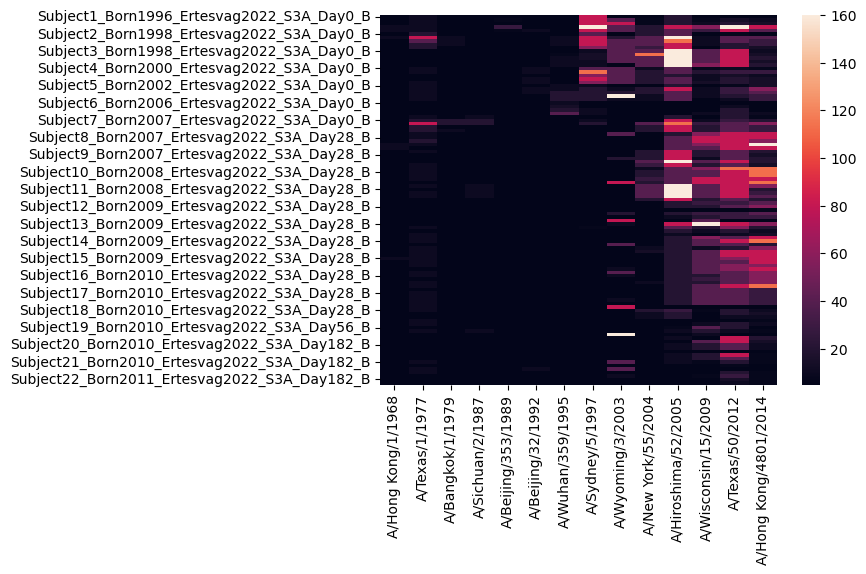

In [27]:
sns.heatmap(E3B_df)